# SCALE Workshop: Data Science with MySQL

## Databases

Relational databases organize data into tables where columns specify the fields that each record specifies, and each row represents a record in the data set.

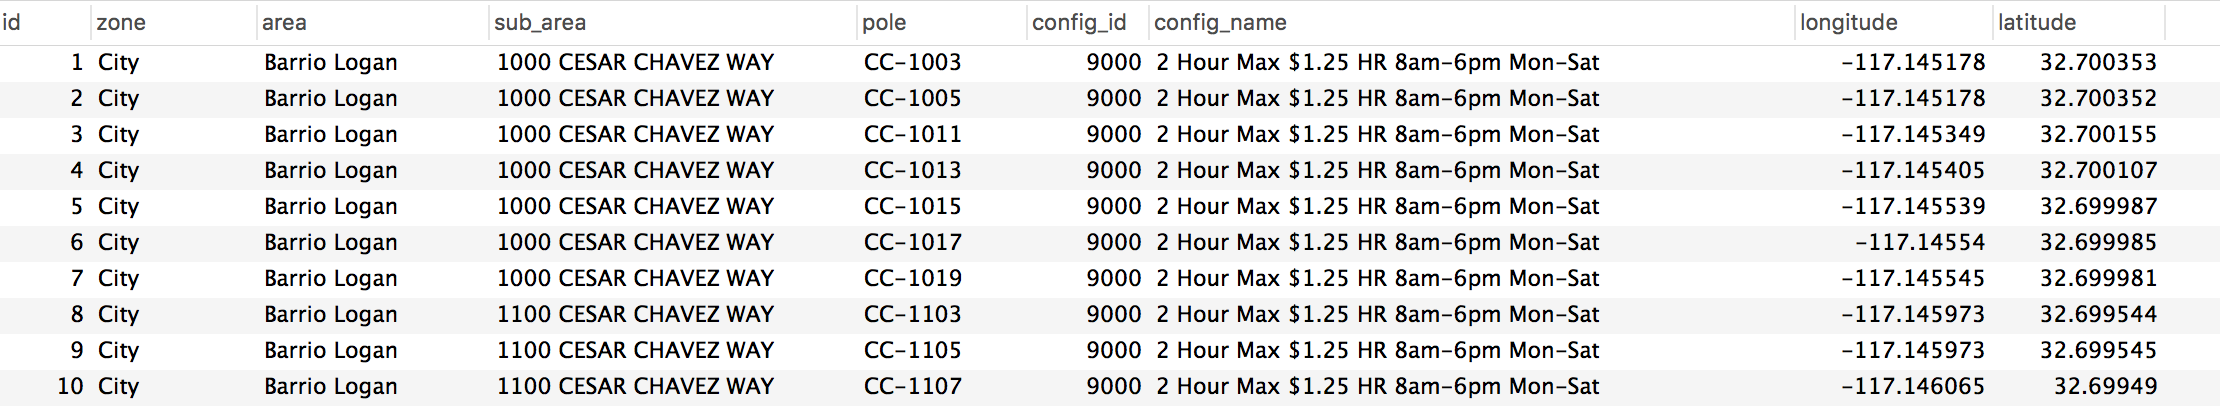

There are four basic operations when working with database data: insert, update, read (or query), and delete.  Each one of these operations maps to a command written in the SQL syntax.

We'll be focusing on effective querying in this workshop.  To query data from a SQL database you use the `SELECT` command.  

Let's build a query for reading data from the table of parking meter locations.

``SELECT * FROM `parking-meter-location` ``

When executed, this will return every column (field) for every record in the table – 4,535 records.

To target specific columns (fields) we can specify them after `SELECT` like so:

``SELECT `pole`, `longitude`, `latitude` FROM `parking-meter-location` ``

And if we only want to return specific rows (records) we can add `WHERE` or `LIMIT` clauses.  

A `WHERE` clause allows you to add a condition that's applied to each row (record) to determine whether it should be returned.  https://community.modeanalytics.com/sql/tutorial/sql-where/

``SELECT `pole`, `longitude`, `latitude` FROM `parking-meter-location` WHERE `area` = 'Point Loma' ``

Similarly, the `LIMIT` clause allows you to specify a maximum number of records (rows) to return.

## Doing things for real
### Connecting to a database

To connect to a databse we need to know where it is running (the host) and the account credentials to access it.  The credentials provided below connect to an AWS RDS instance that has been loaded with 2017 parking meter data.

In [1]:
import os
import pymysql
import pandas as pd

host = 'workshop-db.cwtu8xwzeht2.us-east-2.rds.amazonaws.com'
user = 'workshop-user'
password = 'K1YT5kqiCtIB'
database = 'workshop'

conn = pymysql.connect(
    host=host,
    user=user,
    passwd=password,
    db=database)

### Executing queries

In [3]:
with conn.cursor() as cursor:
    query = "SELECT * FROM `parking-meter-location`"
    cursor.execute(query)
    results = cursor.fetchall()
    print(results)    

((1, 'City', 'Barrio Logan', '1000 CESAR CHAVEZ WAY', 'CC-1003', 9000, '2 Hour Max $1.25 HR 8am-6pm Mon-Sat', -117.145178, 32.700353), (2, 'City', 'Barrio Logan', '1000 CESAR CHAVEZ WAY', 'CC-1005', 9000, '2 Hour Max $1.25 HR 8am-6pm Mon-Sat', -117.145178, 32.700352), (3, 'City', 'Barrio Logan', '1000 CESAR CHAVEZ WAY', 'CC-1011', 9000, '2 Hour Max $1.25 HR 8am-6pm Mon-Sat', -117.145349, 32.700155), (4, 'City', 'Barrio Logan', '1000 CESAR CHAVEZ WAY', 'CC-1013', 9000, '2 Hour Max $1.25 HR 8am-6pm Mon-Sat', -117.145405, 32.700107), (5, 'City', 'Barrio Logan', '1000 CESAR CHAVEZ WAY', 'CC-1015', 9000, '2 Hour Max $1.25 HR 8am-6pm Mon-Sat', -117.145539, 32.699987), (6, 'City', 'Barrio Logan', '1000 CESAR CHAVEZ WAY', 'CC-1017', 9000, '2 Hour Max $1.25 HR 8am-6pm Mon-Sat', -117.14554, 32.699985), (7, 'City', 'Barrio Logan', '1000 CESAR CHAVEZ WAY', 'CC-1019', 9000, '2 Hour Max $1.25 HR 8am-6pm Mon-Sat', -117.145545, 32.699981), (8, 'City', 'Barrio Logan', '1100 CESAR CHAVEZ WAY', 'CC-1103'

### Displaying data
We can use Pandas to read the results into a DataFrame and print it nicely.

In [53]:
with conn.cursor() as cursor:
    query = "SELECT * FROM `parking-meter-location`"
    df = pd.read_sql(query, conn)
    print(df)

        id    zone                area                sub_area     pole  \
0        1    City        Barrio Logan   1000 CESAR CHAVEZ WAY  CC-1003   
1        2    City        Barrio Logan   1000 CESAR CHAVEZ WAY  CC-1005   
2        3    City        Barrio Logan   1000 CESAR CHAVEZ WAY  CC-1011   
3        4    City        Barrio Logan   1000 CESAR CHAVEZ WAY  CC-1013   
4        5    City        Barrio Logan   1000 CESAR CHAVEZ WAY  CC-1015   
5        6    City        Barrio Logan   1000 CESAR CHAVEZ WAY  CC-1017   
6        7    City        Barrio Logan   1000 CESAR CHAVEZ WAY  CC-1019   
7        8    City        Barrio Logan   1100 CESAR CHAVEZ WAY  CC-1103   
8        9    City        Barrio Logan   1100 CESAR CHAVEZ WAY  CC-1105   
9       10    City        Barrio Logan   1100 CESAR CHAVEZ WAY  CC-1107   
10      11    City        Barrio Logan   1100 CESAR CHAVEZ WAY  CC-1109   
11      12    City        Barrio Logan   1100 CESAR CHAVEZ WAY  CC-1111   
12      13    City       

#### We can make it even prettier if we want...

In [72]:
from IPython.display import display, HTML

with conn.cursor() as cursor:
    query = "SELECT * FROM `parking-meter-location`"
    df = pd.read_sql(query, conn)
    display(df)

,id,zone,area,sub_area,pole,config_id,config_name,longitude,latitude
0,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
1,2,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1005,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700352
2,3,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1011,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145349,32.700155
3,4,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1013,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145405,32.700107
4,5,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1015,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145539,32.699987
5,6,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1017,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145540,32.699985
6,7,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1019,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145545,32.699981
7,8,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1103,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145973,32.699544
8,9,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1105,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145973,32.699545
9,10,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1107,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.146065,32.699490


## Targeting your queries
Adding predicates to the `where` clause lets you filter the results.

In [4]:
with conn.cursor() as cursor:
    query = "SELECT `pole`, `longitude`, `latitude` FROM `parking-meter-location` \
                WHERE `area` = 'Point Loma'"
    df = pd.read_sql(query, conn)
    display(df)

,pole,longitude,latitude
0,ADN-2912,-117.230904,32.721670
1,ADN-2914,-117.230913,32.721575
2,S-2707,-117.228565,32.721025
3,S-2712,-117.228530,32.721192
4,S-2713,-117.228706,32.721110
5,S-2714,-117.228681,32.721284
6,S-2717,-117.228847,32.721195
7,S-2720,-117.228823,32.721369


#### You can use simple comparison operators =, <>, >, <, >=, <= to filter numeric values and logical operators AND, OR, NOT to create complex predicates.

In [56]:
with conn.cursor() as cursor:
    query = "SELECT `pole`, `longitude`, `latitude` FROM `parking-meter-location` \
                WHERE `latitude` > 32.699490 \
                    AND `longitude` < -117.145973"
    df = pd.read_sql(query, conn)
    display(df)

,pole,longitude,latitude
0,CC-1109,-117.146065,32.699491
1,CC-1115,-117.145978,32.699501
2,CC-1117,-117.146053,32.699556
3,MN-1827,-117.147804,32.699751
4,NL-1701,-117.148149,32.702693
5,NL-1703,-117.147903,32.702524
6,NL-1711,-117.147627,32.702333
7,NL-1713,-117.147382,32.702164
8,NL-1749,-117.147137,32.701994
9,NL-1751,-117.146234,32.701368


#### Simplify range queries using `BETWEEN`

In [57]:
with conn.cursor() as cursor:
    query = "SELECT `pole`, `longitude`, `latitude` FROM `parking-meter-location` \
                WHERE `latitude` BETWEEN 32.6993 AND 32.69949 \
                    AND `longitude` BETWEEN -117.146186 AND -117.145973"
    df = pd.read_sql(query, conn)
    display(df)

,pole,longitude,latitude
0,CC-1107,-117.146065,32.69949


####  Using wildcards in your queries
Wildcards allow you to accept strings based on patterns

In [58]:
with conn.cursor() as cursor:
    query = "SELECT `pole`, `longitude`, `latitude` FROM `parking-meter-location` \
                WHERE `sub_area` LIKE '*CESAR*'"
    df = pd.read_sql(query, conn)
    display(df)

,pole,longitude,latitude


#### Except that wildcards in SQL are '%' and '_'

In [7]:
with conn.cursor() as cursor:
    query = "SELECT `sub_area`,`pole`, `longitude`, `latitude` FROM `parking-meter-location` \
                WHERE `sub_area` LIKE '% A ST%'"
    df = pd.read_sql(query, conn)
    display(df)

,sub_area,pole,longitude,latitude
0,100 A ST,A-106,-117.163646,32.718913
1,100 A ST,A-108,-117.163477,32.718914
2,100 A ST,A-110,-117.163309,32.718915
3,100 A ST,A-112,-117.163141,32.718915
4,200 A ST,A-200,-117.162815,32.718917
5,200 A ST,A-202,-117.162749,32.718918
6,200 A ST,A-204,-117.162666,32.718918
7,200 A ST,A-205,-117.162598,32.718765
8,200 A ST,A-206,-117.162516,32.718919
9,200 A ST,A-208,-117.162450,32.718920


### Building a better result set
#### Grouping by a column (field) allows you to get aggregate by unique values

In [8]:
with conn.cursor() as cursor:
    query = "SELECT `sub_area`,`pole`, `longitude`, `latitude` FROM `parking-meter-location` \
                GROUP BY `sub_area`"
    df = pd.read_sql(query, conn)
    display(df)

,sub_area,pole,longitude,latitude
0,100 A ST,A-106,-117.163646,32.718913
1,100 ASH ST,AH-109,-117.163617,32.719820
2,100 ELM ST,EM-105,-117.163745,32.723986
3,100 FIR ST,FI-101,-117.163755,32.725025
4,100 G ST,G-102,-117.163700,32.712630
5,100 ISLAND AVE,SL-100,-117.163610,32.710484
6,100 J ST,J-108,-117.163550,32.709440
7,100 JUNIPER ST,JN-100,-117.163652,32.729358
8,100 MARKET ST,H-103,-117.163600,32.711396
9,100 NUTMEG ST,NU-100,-117.163754,32.733543


#### But that's not  the 20 results I want
You can use `ORDER BY` to sort the results before truncating them.

In [61]:
with conn.cursor() as cursor:
    query = "SELECT `sub_area`,`pole`, `longitude`, `latitude` FROM `parking-meter-location` \
                GROUP BY `sub_area` \
                ORDER BY `pole` ASC \
                LIMIT 20"
    df = pd.read_sql(query, conn)
    display(df)

,sub_area,pole,longitude,latitude
0,1000 FIRST AVE,1-1004,-117.163929,32.715904
1,1300 FIRST AVE,1-1310,-117.163951,32.719024
2,1400 FIRST AVE,1-1400,-117.163956,32.720080
3,2000 FIRST AVE,1-2001,-117.163823,32.726293
4,2100 FIRST AVE,1-2118,-117.164013,32.727500
5,2200 FIRST AVE,1-2214,-117.164016,32.728391
6,2300 FIRST AVE,1-2309,-117.163815,32.729446
7,300 FIRST AVE,1-305,-117.163786,32.709398
8,700 FIRST AVE,1-710,-117.163906,32.712703
9,800 FIRST AVE,1-800,-117.163914,32.714179


#### We can also output aggregated values from our result set
https://community.modeanalytics.com/sql/tutorial/sql-aggregate-functions/

In [14]:
with conn.cursor() as cursor:
    query = "SELECT `sub_area`, `config_name`, COUNT(`pole`),`pole`, `longitude`, `latitude`, AVG(`longitude`), AVG(`latitude`) FROM `parking-meter-location` \
                GROUP BY `sub_area`,`config_name` \
                ORDER BY COUNT(`pole`) DESC LIMIT 20"
    df = pd.read_sql(query, conn)
    display(df)

,sub_area,config_name,COUNT(`pole`),pole,longitude,latitude,AVG(`longitude`),AVG(`latitude`)
0,3600 FIFTH AVE,2 Hour Max $1.25 HR 10am-8pm Mon-Sat (Mobile Pay),34,5-3600,-117.160491,32.743414,-117.160446,32.744210
1,3900 FIFTH AVE,2 Hour Max $1.25 HR 10am-8pm Mon-Sat (Mobile Pay),28,5-3902,-117.160540,32.748479,-117.160468,32.749147
2,1600 HARBOR DR,2 Hour Max $1.25 HR 8am-6pm Mon-Sat (Mobile Pay),27,HRB-1601,-117.172901,32.721168,-117.172866,32.722123
3,3900 FOURTH AVE,2 Hour Max $1.25 HR 10am-8pm Mon-Sat (Mobile Pay),26,4-3900,-117.161710,32.748407,-117.161629,32.749096
4,3800 FIFTH AVE,2 Hour Max $1.25 HR 10am-8pm Mon-Sat (Mobile Pay),24,5-3801,-117.160344,32.747052,-117.160456,32.747606
5,3700 INDIA ST,2 Hour Max $1.25 HR 8am-6pm Mon-Sat (Mobile Pay),23,N-3705,-117.180619,32.742676,-117.181252,32.743381
6,3700 FIFTH AVE,2 Hour Max $1.25 HR 10am-8pm Mon-Sat (Mobile Pay),22,5-3700,-117.160507,32.745255,-117.160448,32.745935
7,3800 FOURTH AVE,2 Hour Max $1.25 HR 10am-8pm Mon-Sat (Mobile Pay),22,4-3802,-117.161700,32.747066,-117.161613,32.747579
8,3700 SIXTH AVE,2 Hour Max $1.25 HR 8am-6pm Mon-Sat (Mobile Pay),22,6-3701,-117.159461,32.745249,-117.158189,32.743619
9,4300 THIRTIETH ST,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,21,30-4316,-117.130094,32.757160,-117.130171,32.756808


### Connecting tables
The power of relational databases comes from the ability to great queries that `JOIN` together data across multiple tables. This is done using identifying fields, called 'keys'.  When we want to return result sets that contains columns (fields) from multiple tables, we use the `JOIN` command.  There are several types of `JOIN`s as illustrated below.


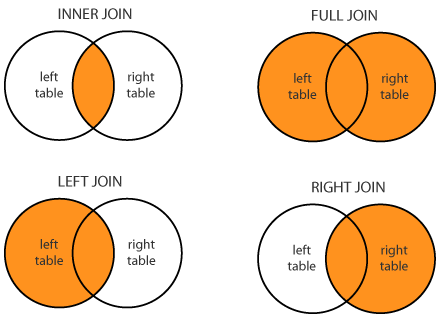

In [63]:
with conn.cursor() as cursor:
    query = "SELECT * FROM `parking-meter-transaction` \
                INNER JOIN `parking-meter-location` ON `pole`=`pole_id` \
                LIMIT 10"
    df = pd.read_sql(query, conn)
    display(df)  

,id,uuid,meter_type,pole_id,trans_amt,pay_method,trans_start,meter_expire,id,zone,area,sub_area,pole,config_id,config_name,longitude,latitude
0,13026,SSCC100317010213531785,SS,CC-1003,85,CASH,2017-01-02 13:53:17,2017-01-02 14:34:05,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
1,29897,SSCC100317010310115975,SS,CC-1003,75,CASH,2017-01-03 10:11:59,2017-01-03 10:47:59,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
2,47136,SSCC100317010315033085,SS,CC-1003,85,CASH,2017-01-03 15:03:30,2017-01-03 15:44:18,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
3,66297,SSCC1003170104105631125,SS,CC-1003,125,CREDIT CARD,2017-01-04 10:56:31,2017-01-04 11:56:31,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
4,105223,SSCC1003170105122235125,SS,CC-1003,125,CREDIT CARD,2017-01-05 12:22:35,2017-01-05 13:22:35,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
5,109155,SSCC1003170105132914100,SS,CC-1003,100,CASH,2017-01-05 13:29:14,2017-01-05 14:17:14,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
6,109484,SSCC100317010513343765,SS,CC-1003,65,CASH,2017-01-05 13:34:37,2017-01-05 14:48:26,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
7,111741,SSCC100317010514143555,SS,CC-1003,55,CASH,2017-01-05 14:14:35,2017-01-05 15:14:50,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
8,138631,SSCC1003170106121457250,SS,CC-1003,250,CREDIT CARD,2017-01-06 12:14:57,2017-01-06 14:14:57,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
9,167506,SSCC100317010710544325,SS,CC-1003,25,CASH,2017-01-07 10:54:43,2017-01-07 11:06:43,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353


#### Sometimes we run into field name collisions and aliasing can help us writer clearer queries.

In [64]:
with conn.cursor() as cursor:
    query = "SELECT * FROM `parking-meter-transaction` tran \
                INNER JOIN `parking-meter-location` loc ON loc.`pole`=tran.`pole_id` \
                LIMIT 10"
    df = pd.read_sql(query, conn)
    display(df) 

,id,uuid,meter_type,pole_id,trans_amt,pay_method,trans_start,meter_expire,id,zone,area,sub_area,pole,config_id,config_name,longitude,latitude
0,13026,SSCC100317010213531785,SS,CC-1003,85,CASH,2017-01-02 13:53:17,2017-01-02 14:34:05,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
1,29897,SSCC100317010310115975,SS,CC-1003,75,CASH,2017-01-03 10:11:59,2017-01-03 10:47:59,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
2,47136,SSCC100317010315033085,SS,CC-1003,85,CASH,2017-01-03 15:03:30,2017-01-03 15:44:18,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
3,66297,SSCC1003170104105631125,SS,CC-1003,125,CREDIT CARD,2017-01-04 10:56:31,2017-01-04 11:56:31,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
4,105223,SSCC1003170105122235125,SS,CC-1003,125,CREDIT CARD,2017-01-05 12:22:35,2017-01-05 13:22:35,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
5,109155,SSCC1003170105132914100,SS,CC-1003,100,CASH,2017-01-05 13:29:14,2017-01-05 14:17:14,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
6,109484,SSCC100317010513343765,SS,CC-1003,65,CASH,2017-01-05 13:34:37,2017-01-05 14:48:26,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
7,111741,SSCC100317010514143555,SS,CC-1003,55,CASH,2017-01-05 14:14:35,2017-01-05 15:14:50,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
8,138631,SSCC1003170106121457250,SS,CC-1003,250,CREDIT CARD,2017-01-06 12:14:57,2017-01-06 14:14:57,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
9,167506,SSCC100317010710544325,SS,CC-1003,25,CASH,2017-01-07 10:54:43,2017-01-07 11:06:43,1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353


## Now let's turn to our Python code from Workshop 1

In [15]:
with conn.cursor() as cursor:
    query = "SELECT `pole_id`,`trans_amt`,`trans_start`,`meter_expire`,`latitude`,`longitude` FROM `parking-meter-transaction` \
                INNER JOIN `parking-meter-location` ON `pole`=`pole_id` \
                WHERE DATE(`trans_start`)='2017-03-17' \
                    AND `latitude` BETWEEN 32.705749 AND 32.716 \
                    AND `longitude` BETWEEN -117.164 AND -117.157"
    df = pd.read_sql(query, conn)
    display(df) 


,pole_id,trans_amt,trans_start,meter_expire,latitude,longitude
0,1-1004,125,2017-03-17 10:36:41,2017-03-17 11:36:41,32.715904,-117.163929
1,1-1004,125,2017-03-17 11:36:37,2017-03-17 12:36:41,32.715904,-117.163929
2,1-1004,25,2017-03-17 12:22:52,2017-03-17 12:48:42,32.715904,-117.163929
3,1-1004,75,2017-03-17 12:23:25,2017-03-17 13:24:42,32.715904,-117.163929
4,1-1004,175,2017-03-17 13:10:41,2017-03-17 14:48:41,32.715904,-117.163929
5,1-1004,165,2017-03-17 14:42:50,2017-03-17 16:07:54,32.715904,-117.163929
6,1-1004,5,2017-03-17 14:42:59,2017-03-17 16:10:18,32.715904,-117.163929
7,1-1004,10,2017-03-17 14:43:05,2017-03-17 16:15:06,32.715904,-117.163929
8,1-1004,20,2017-03-17 14:43:20,2017-03-17 16:24:42,32.715904,-117.163929
9,1-1004,10,2017-03-17 14:43:38,2017-03-17 16:29:30,32.715904,-117.163929


#### Can we improve on our query?

In [16]:
with conn.cursor() as cursor:
    query = "SELECT `pole_id`,`latitude`,`longitude` FROM `parking-meter-transaction` \
                INNER JOIN `parking-meter-location` ON `pole`=`pole_id` \
                WHERE DATE(`trans_start`)='2017-03-17' \
                    AND `latitude` BETWEEN 32.705749 AND 32.716 \
                    AND `longitude` BETWEEN -117.164 AND -117.157 \
                GROUP BY `pole_id`"
    df = pd.read_sql(query, conn)
    display(df) 


,pole_id,latitude,longitude
0,1-1004,32.715904,-117.163929
1,1-305,32.709398,-117.163786
2,1-307,32.709169,-117.163659
3,1-309,32.709220,-117.163659
4,1-710,32.712703,-117.163906
5,1-712,32.712781,-117.163907
6,1-714,32.712879,-117.163907
7,1-715,32.712958,-117.163726
8,1-716,32.713055,-117.163909
9,1-717,32.713134,-117.163727


## Optimizing slow queries
### Table indexes 
https://www.tutorialspoint.com/mysql/mysql-indexes.htm

How indexes work

https://stackoverflow.com/questions/3567981/how-do-mysql-indexes-work

### Analyzing queries
https://dzone.com/articles/understanding-mysql-queries-with-explain

## How do we set this up locally?
### Installing MySQL
### Creating accounts and granting access
### Creating tables 
Schema provided in workshop materials for the examples above